# Logistic Regressions, Predictive Analytics in Python

### Project by: Analia Colffer

    In this project I used the dataset "Movie Industry" by Daniel Grijalva to predict a movie's gross income. I explored the data, conducted data cleaning, created visualizations for variables, made a correlation analysis, and conducted logistic regression analysis. 
    
    The project is divided in 4 parts:
    - Part 1: Exploratory Analysis
    - Part 2: Data Cleaning
    - Part 3: Data Visualization and Correlation Analysis
    - Part 4: Logistic Regression Analysis
    
    Dataset spurce: https://www.kaggle.com/datasets/danielgrijalvas/movies 
    

In [3]:
# Import packages 

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
import statsmodels
from statsmodels.formula.api import ols

#%matplotlib.inline
#matplotlib.rcParams['figure.figsize'] = (12,8)

In [4]:
# Read in the data

df = pd.read_csv("movies.csv")
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


# Part 1: Exploratory Analysis


      I chose this dataset for analysis because I love watching movies! Looking at this dataset, my immediate assumption is that the biggest contributor to a movie's gross income is the budget. Hence, through this analysis I will explore the relationship between gross income and the different variables, with the objective of identifying the variable with the highest correlation to gross income.
      

### Data Dictionary:


    - budget: the budget of a movie. 
    - company: the production company
    - country: country of origin
    - director: the director
    - genre: main genre of the movie.
    - gross: revenue of the movie
    - name: name of the movie
    - rating: rating of the movie (R, PG, etc.)
    - released: release date (YYYY-MM-DD)
    - runtime: duration of the movie
    - score: IMDb user rating
    - votes: number of user votes
    - star: main actor/actress
    - writer: writer of the movie
    - year: year of release
    

In [5]:
# Visualize columns, rows, and data type

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [6]:
# Find percentage of missing data per column

for col in df.columns:
    pct_missing = round(np.mean(df[col].isnull()), 3)
    print('{} - {}%'.format(col, pct_missing))

name - 0.0%
rating - 0.01%
genre - 0.0%
year - 0.0%
released - 0.0%
score - 0.0%
votes - 0.0%
director - 0.0%
writer - 0.0%
star - 0.0%
country - 0.0%
budget - 0.283%
gross - 0.025%
company - 0.002%
runtime - 0.001%


In [7]:
# Get summary stats for numerical variables

round(df.describe(), 2)

,year,score,votes,budget,gross,runtime
count,7668.00,7665.00,7665.00,5.497000e+03,7.479000e+03,7664.00
mean,2000.41,6.39,88108.50,3.558988e+07,7.850054e+07,107.26
std,11.15,0.97,163323.76,4.145730e+07,1.657251e+08,18.58
min,1980.00,1.90,7.00,3.000000e+03,3.090000e+02,55.00
25%,1991.00,5.80,9100.00,1.000000e+07,4.532056e+06,95.00
50%,2000.00,6.50,33000.00,2.050000e+07,2.020576e+07,104.00
75%,2010.00,7.10,93000.00,4.500000e+07,7.601669e+07,116.00
max,2020.00,9.30,2400000.00,3.560000e+08,2.847246e+09,366.00



#### Insights:
    
    -The dataset has 15 columns and a total of 7,668 rows. The data types are onject, float, and integer. 
    - The column with the most null values is budget, with 2171 values missing (roughly 28% of its data). This is concerning because my assumption is that budget is the biggest predictor for a movie's gross income, which means that I will need to handle the null values in budget before I start.
    - The column "gross" also has 2.5% of its values missing
    - The columns gross and income have very large values, I will divide the values into 1 million to make them easier to analyze
    - The "year" variable is coded as an integer, but it should be categorical (to make analysis easier).
    - The standard deviation for votes, budget, and gross income is high - this means the data will be highly skewed.
    - The column "year" appears in the summary statistics because its current data type is numerical. This will be changed in the next section, since I have no need to know the year's mean or median values.
    

# Part 2: Data Cleaning

In [8]:
#Changing data type of year  to categorical

df['year'] = df['year'].astype('object')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   object 
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), object(10)
memory usage: 898.7+ KB


In [10]:
# Fill missing values in budget and gross income columns with their respective median values

df2 = df
df2 = df2.fillna({'gross' : df['gross'].median(),
                 'budget' : df['budget'].median()})
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   object 
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    7668 non-null   float64
 12  gross     7668 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), object(10)
memory usage: 898.7+ KB


In [11]:
# Changing data types of budget and gross income to integers

df2['budget'] = df2['budget'].astype('int64')
df2['gross'] = df2['gross'].astype('int64')

# Check data types again to make sure change was made
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   object 
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), object(10)
memory usage: 898.7+ KB


In [12]:
# Creating a flag variable for US and Non US Movies

df3 = df2
df3['country_flag'] = ['US' if x == 'United States' else 'Non US' for x in df['country']]
df3.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,country_flag
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,Non US
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,US
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,US
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,US
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,US


In [13]:
# Getting rid of unnecessary columns

df4 = df3.drop(columns=['name', 'released', 'director', 'writer', 'star', 'company'])
df4.head()

,rating,genre,year,score,votes,country,budget,gross,runtime,country_flag
0,R,Drama,1980,8.4,927000.0,United Kingdom,19000000,46998772,146.0,Non US
1,R,Adventure,1980,5.8,65000.0,United States,4500000,58853106,104.0,US
2,PG,Action,1980,8.7,1200000.0,United States,18000000,538375067,124.0,US
3,PG,Comedy,1980,7.7,221000.0,United States,3500000,83453539,88.0,US
4,R,Comedy,1980,7.3,108000.0,United States,6000000,39846344,98.0,US


In [14]:
# Decreasing scale of budget and gross income. These two variables will be "in millions" moving forward

df4['budget'] = df4['budget']/1000000
df4['gross'] = df4['gross']/1000000
df4.head()

,rating,genre,year,score,votes,country,budget,gross,runtime,country_flag
0,R,Drama,1980,8.4,927000.0,United Kingdom,19.0,46.998772,146.0,Non US
1,R,Adventure,1980,5.8,65000.0,United States,4.5,58.853106,104.0,US
2,PG,Action,1980,8.7,1200000.0,United States,18.0,538.375067,124.0,US
3,PG,Comedy,1980,7.7,221000.0,United States,3.5,83.453539,88.0,US
4,R,Comedy,1980,7.3,108000.0,United States,6.0,39.846344,98.0,US


    In this section, I:

    - Filled missing values in budget and gross income columns with their median values
    - Changed the data type of the budget and gross income columns to integers in order to get rid of decimals
    - Deleetd columns that are not needed for analysis
    - Divided the gross income and budget columns into 1 million to make analysis easier
    

# Part 3: Data Visualization and Correlation Analysis

Text(0.5, 1.0, 'Number of Movies: US vs. Non US')

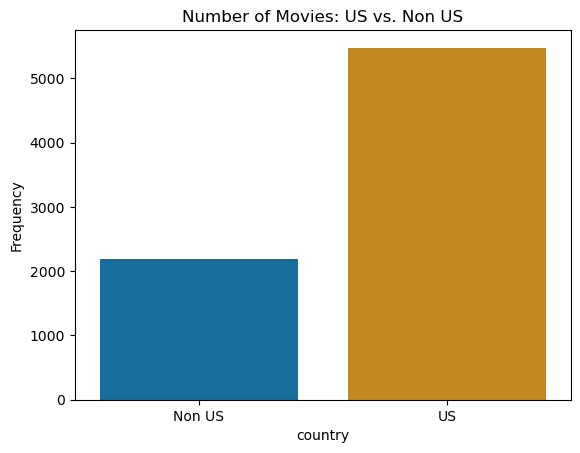

In [16]:
# Number of movies by US and Non US Movies

fig = plt.figure()
ax = fig.add_subplot(111)
sns.countplot(data=df4, x="country_flag", palette="colorblind")
ax.set_xlabel('country')
ax.set_ylabel('Frequency')
ax.set_title('Number of Movies: US vs. Non US')


    I chose a countplot for this graph because I wanted to know how many movies were released in the US vs. internationally. The graph above is showing that in this dataset, approximately 2000 movies were released internationally andover 5000 movies were released in the US. 
    

C:\Users\Graduate\AppData\Local\Temp\ipykernel_4036\4172058320.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df4.corr()


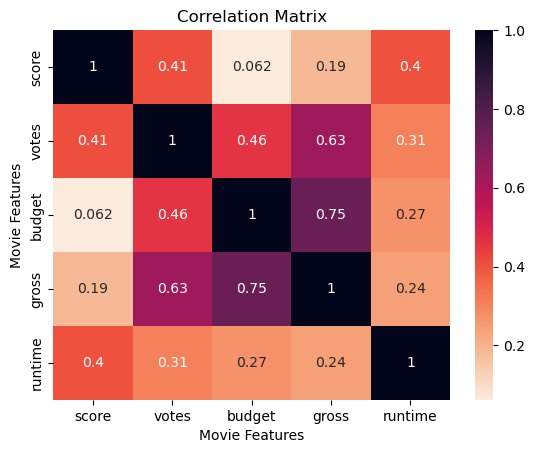

In [17]:
# Create correlation matrix

corr_matrix = df4.corr()

sns.heatmap(corr_matrix, annot=True, cmap= 'rocket_r')

plt.title('Correlation Matrix')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.tight_layout
plt.show()


    I decided to crate a correlation matrix because I wanted to know which numerical variables are the most correlated to gross income.
    From the graph above, I can immediately see that budget has the strongest contribution, with a 0.75 correlation - followed by votes and runtime. 
    

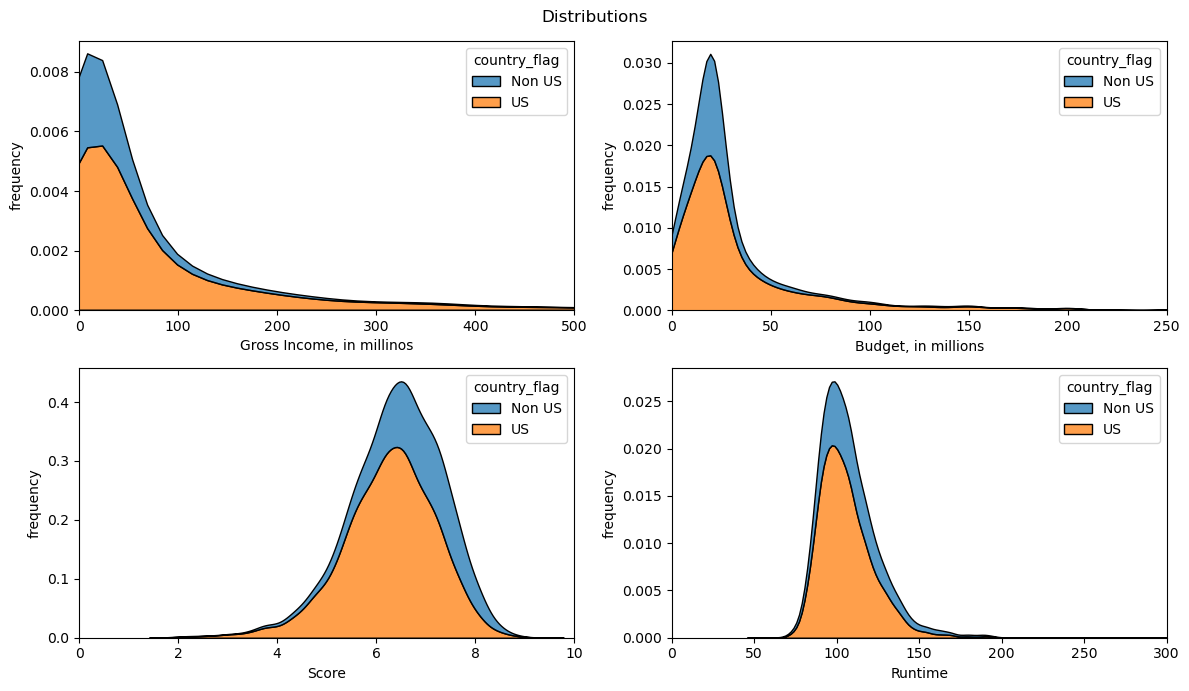

In [19]:
# Distributions

plt.figure(figsize=(12,7))
plt.suptitle('Distributions')

plt.subplot(2,2,1)
sns.kdeplot(data=df4, x="gross", hue = "country_flag", multiple="stack")
plt.xlim(0.000, 500)
plt.xlabel('Gross Income, in millinos')
plt.ylabel('frequency')

plt.subplot(2,2,2)
sns.kdeplot(data=df4, x="budget", hue = "country_flag", multiple="stack")
plt.xlim(0, 250)
plt.xlabel('Budget, in millions')
plt.ylabel('frequency')

plt.subplot(2,2,3)
sns.kdeplot(data=df4, x="score", hue = "country_flag", multiple="stack")
plt.xlim(0, 10)
plt.xlabel('Score')
plt.ylabel('frequency')

plt.subplot(2,2,4)
sns.kdeplot(data=df4, x="runtime", hue = "country_flag", multiple="stack")
plt.xlim(0, 300)
plt.xlabel('Runtime')
plt.ylabel('frequency')

plt.tight_layout()
plt.show()


    - I chose to create kde plots because I wanted to see the distribution of gross income, budget, score, and runtime by country_flaf. This means, visualizing the difference in each variable's distribution taking into account movies that were released in the US, and movies that wre released internationally. 
    - From the graph above I see that both gross income and budget are highly skewed. This is because of outliers in the dataset - a few movies with unusually large gross income and budget are driving the skewness. International movies overall have higher gross income and budget compared to movies released in the US. 
    - The average score for movies is between 6 and 8 for most movies, both US and international
    - The average runtime is between 100 and 10 movies for both US and international movies
    

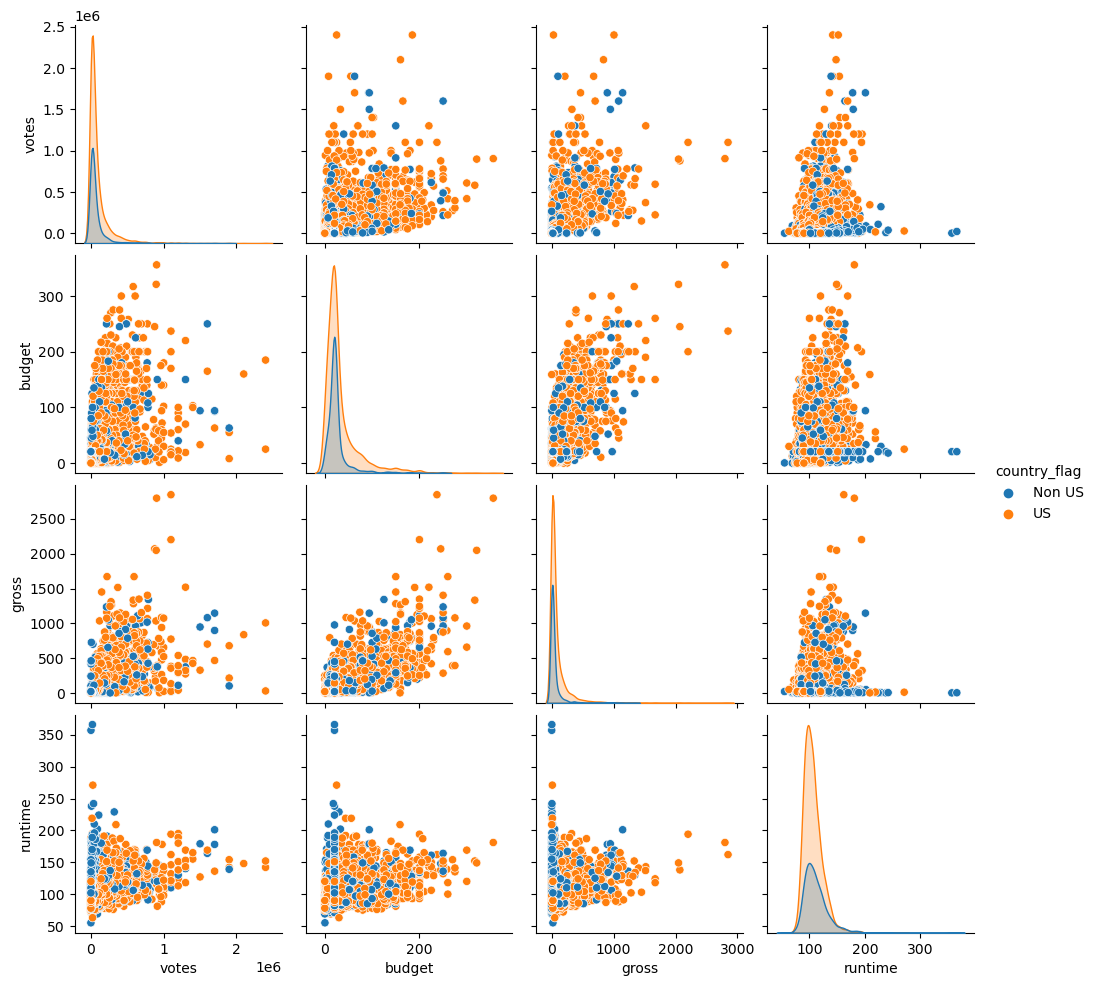

In [21]:
# Create pairplot to see how these variables interact with each other

df6 = df4[df4.columns[4:10]]
sns.pairplot(data=df6, hue="country_flag")


    I chose to create a pairplot because I wanted to visualize the relationships between these 4 variables, along with their distributions. From this graph, I can already see the strong correlation between gross income and budget, as expected. However, since the graphs are so small it is difficult to see the correlations. It is also difficult to differenciate between US and international movies. 
  

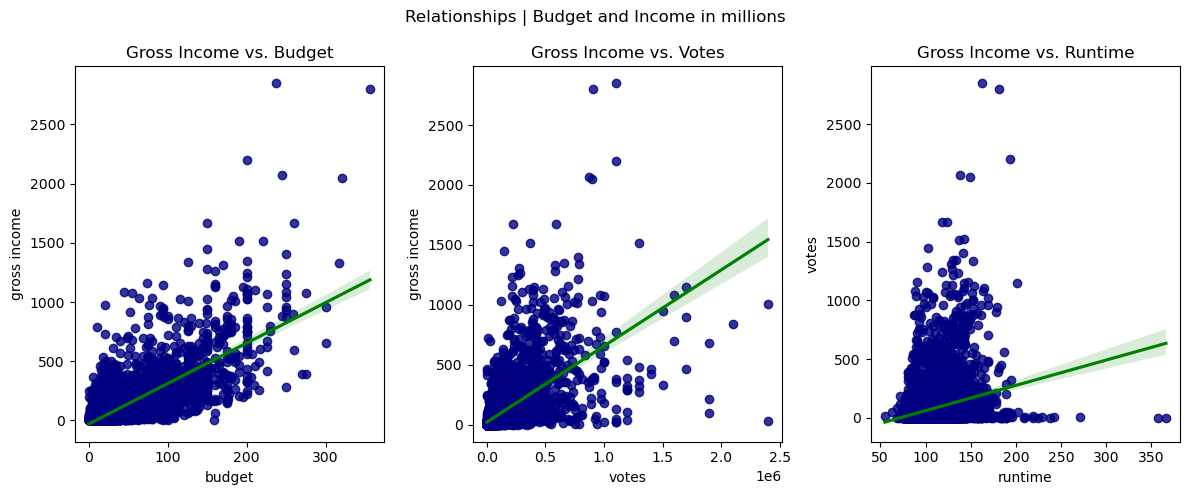

In [22]:
# Create scatterplots

plt.figure(figsize=(12,5))
plt.suptitle('Relationships | Budget and Income in millions')
#plt.subplots_adjust(hspace=.5)

plt.subplot(1,3,1)
sns.regplot(data=df4,x='budget', y='gross',
           scatter_kws={"color":"navy"}, line_kws={"color": "green"}).set(title='Gross Income vs. Budget')
plt.ylabel('gross income')

plt.subplot(1,3,2)
sns.regplot(data=df4, x='votes', y='gross',
           scatter_kws={"color":"navy"}, line_kws={"color": "green"}).set(title='Gross Income vs. Votes')
plt.ylabel('gross income')

plt.subplot(1,3,3)
sns.regplot(data=df4, x='runtime', y='gross',
           scatter_kws={"color":"navy"}, line_kws={"color": "green"}).set(title='Gross Income vs. Runtime')
plt.ylabel('votes')

plt.tight_layout()
plt.show()

    
    Lastly, I created these three scatterplots because I wanted to take a closer look at the relationship between gross income and budget, votes, and runtime. Between these three variables, runtime has the lowest correlation with gross income. Votes has a strong correlation too, but the data has more variability. The strongest correlation is between budget and gross income, which was my initial assumption. 
    

# Part 4: Logistic Regression Analysis

In [17]:
# Model 1 - Gross income and age
model1 = ols("gross ~ age", data = df2).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                  gross   R-squared:                       0.067
Model:                            OLS   Adj. R-squared:                  0.067
Method:                 Least Squares   F-statistic:                     553.5
Date:                Mon, 15 Apr 2024   Prob (F-statistic):          3.09e-118
Time:                        16:25:34   Log-Likelihood:            -1.5565e+05
No. Observations:                7668   AIC:                         3.113e+05
Df Residuals:                    7666   BIC:                         3.113e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    1.67e+08   4.23e+06     39.487      0.0

#### Insights:
    
    - In the first model, I used gross income as the target variable and age of the movie as a predictive variable. 
    - In this model, the R-squared is 0.067 - this means that the current model only explains 6.7% of the variation in gross income
    - I will add more variables to increase R-squared
    

In [18]:
# Model 2: Gross income and age + votes

model2 = ols("gross ~ age + votes", data = df2).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                  gross   R-squared:                       0.414
Model:                            OLS   Adj. R-squared:                  0.414
Method:                 Least Squares   F-statistic:                     2712.
Date:                Mon, 15 Apr 2024   Prob (F-statistic):               0.00
Time:                        16:25:34   Log-Likelihood:            -1.5381e+05
No. Observations:                7665   AIC:                         3.076e+05
Df Residuals:                    7662   BIC:                         3.076e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    6.71e+07   3.67e+06     18.283      0.0

#### Insights:
    
    - In the first model, I used gross income as the target variable and age and votes as the predictive variables. 
    - In this model, the R-squared is 0.414, a significant improvement compared to model 1. This means that the current model explains 41.7% of the variation in gross income
    - I will add more variables to increase R-squared

In [19]:
# Model 3: Gross income and age + votes + runtime + budget

model3 = ols("gross ~ age + votes + runtime + budget", data = df2).fit()
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:                  gross   R-squared:                       0.663
Model:                            OLS   Adj. R-squared:                  0.663
Method:                 Least Squares   F-statistic:                     3763.
Date:                Mon, 15 Apr 2024   Prob (F-statistic):               0.00
Time:                        16:25:34   Log-Likelihood:            -1.5162e+05
No. Observations:                7661   AIC:                         3.032e+05
Df Residuals:                    7656   BIC:                         3.033e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -6.392e+06   7.14e+06     -0.895      0.3

#### Insights:
    
    - In the first model I used gross income as the target variable, and age, votes, runtime, and budget as the predictive variables. 
    - In this model, the R-squared is 0.663. This means that the current model explains 66.3% of the variation in gross income
    - Since the model has more variables, we can start seeing p-values. As of now, age has a p=value of 0.110 meaning that is not significant
    - I will add the last variable to see if R-squared increases

In [20]:
# Model 4: Gross income and age + votes + runtime + budget + score

model4 = ols("gross ~ age + votes + runtime + budget + score", data = df2).fit()
print(model4.summary())

                            OLS Regression Results                            
Dep. Variable:                  gross   R-squared:                       0.663
Model:                            OLS   Adj. R-squared:                  0.663
Method:                 Least Squares   F-statistic:                     3011.
Date:                Mon, 15 Apr 2024   Prob (F-statistic):               0.00
Time:                        16:25:34   Log-Likelihood:            -1.5161e+05
No. Observations:                7661   AIC:                         3.032e+05
Df Residuals:                    7655   BIC:                         3.033e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.563e+07   9.39e+06     -1.665      0.0

#### Insights:
    
    - In the first model I used gross income as the target variable, and age, votes, runtime, budget, and score as the predictive variables. 
    - In this model, the R-squared is 0.663. It did not improve compared to model 3. 
    - This model shows that age has a p-value of 0.124, and score has a p-value of 0.129. This means that:
        - There is a 12.4% chance that age does not have an effect on gross income
        - There is a 12.9% chance that score does not have an effect on gross income


## Summary:

    - Our current model explains 63.3% of the variation in gross income. 
    - The variables budget and votes have the highest correlations with the movies' gross income
    - In order to strengthen this analysis, I suggest including categorical variables such as company and writer as predictor variables